# Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare Data

In [ ]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


# K-Mean Model

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=44)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[1 1 9 0 9 6 9 6 6 6 2 4 4 2 6 2 2 4 7 6 0 5 2 7 1 4 6 4 4 4 9 6 4 1 4 4 6
 0 6 6 6 0 9 6 6 9 5 6 0 6 0 6 0 4 2 0 1 2 0 5 5 5 2 5 6 2 5 0 5 0 1 5 9 6
 0 4 0 9 9 0 0 0 3 4 0 9 6 9 0 6 6 6 6 6 2 1 0 5 0 6 6 5 0 5 5 6 0 0 7 0 5
 0 6 5 5 0 5 2 4 4 0 9 7 6 0 6 6 9 6 9 0 2 4 2 9 0 0 0 2 5 5 4 0 0 5 0 0 6
 6 6 0 5 5 5 6 0 4 2 0 0 0 9 7 0 7 6 5 4 9 6 0 2 2 5 5 5 5 2 0 0 3 1 4 0 2
 5 4 0 0 0 6 0 5 6 6 0 6 4 9 2 0 4 7 2 0 2 5 4 0 2 9 0 3 2 6 6 0 5 1 7 6 6
 5 2 6 6 5 6 0 6 4 0 0 1 5 6 3 1 6 4 6 0 0 6 9 5 0 0 5 0 1 0 1 4 1 6 1 2 4
 2 1 4 4 2 4 3 5 6 0 5 6 0 7 5 4 0 0 4 6 6 9 0 9 2 0 0 0 0 5 0 6 6 0 0 0 6
 5 0 6 5 1 0 9 5 0 0 0 5 6 6 0 6 0 0 5 0 0 9 5 0 5 9 0 1 0 0 6 0 2 2 2 0 5
 0 0 4 0 1 5 3 6 5 5 9 0 5 0 6 0 0 0 2 3 2 0 0 0 6 5 5 0 0 0 2 6 1 9 0 3 7
 4 6 9 1 6 2 5 6 6 0 0 5 0 0 0 6 0 6 0 4 5 5 4 7 0 6 6 0 0 0 4 0 0 0 0 0 2
 0 4 0 0 0 5 6 2 0 5 9 0 0 0 6 0 6 5 5 5 0 5 0 6 0 9 9 6 6 0 6 6 6 0 4 6 5
 4 0 4 6 6 1 0 9 0 6 0 6 0 0 0 5 9 8 6 0 6 6 6 5 4 0 5 0 2 0 5 0 6 6 0 2 0
 6 6 6 2 0 6 9 0 2 0 4 4 

# Scatter plot of the data points

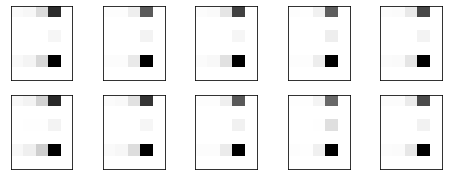

In [ ]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9086115992970123

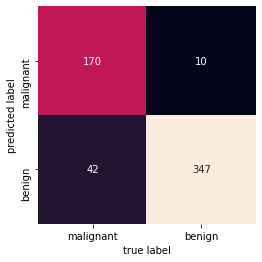

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');